In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
file = 'logins.json'
f = open(file)
logins = json.loads(f.read())
f.close()

In [3]:
#inspect keys
logins.keys()

dict_keys(['login_time'])

In [4]:
#how much data
print(len(logins['login_time']))

93142


In [5]:
#create dataframe
df_logins = pd.DataFrame(pd.to_datetime(logins['login_time']),columns=['login_time'])
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
#check for na values
df_logins[df_logins['login_time'].isna()].shape

(0, 1)

In [7]:
#add count column for resample
df_logins['count'] = 1
#set login time as index for resampling
df_logins.index = df_logins['login_time']
#drop redundant column
df_logins.drop('login_time',axis=1,inplace=True)
df_logins.tail()

,count
login_time,
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1
1970-04-13 18:57:38,1
1970-04-13 18:54:23,1


<AxesSubplot:xlabel='login_time'>

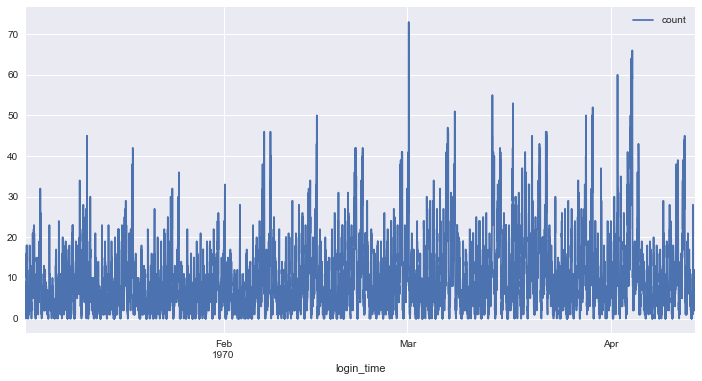

In [8]:
df_count = df_logins.resample('15min').sum()
df_count.plot(kind='line',figsize=(12,6))

In [9]:
###Plotting the 15 minute intervals over the 4 month period, we can see a sinusoidal pattern that seems to have an average value that is increasing.
df_count.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [10]:
###The average number of logins per 15 minutes is 7. The mean is being pulled up by the spikes in our dataset. Let's take a look at the day distributions of the logins.

In [11]:
#create new columns for items of interest
df_count = df_count.assign(month_day=df_count.index.day)
df_count = df_count.assign(weekday=df_count.index.weekday)
df_count.head()

,count,month_day,weekday
login_time,,,
1970-01-01 20:00:00,2,1,3
1970-01-01 20:15:00,6,1,3
1970-01-01 20:30:00,9,1,3
1970-01-01 20:45:00,7,1,3
1970-01-01 21:00:00,1,1,3


In [12]:
spike = np.quantile(df_count,0.99)
df_spike = df_count[df_count['count'] >= spike]
month_days = []
weekdays = []
for date in df_spike.index:
    month_days.append(date.day)
    weekdays.append(date.weekday())
    
df_spike_days = pd.DataFrame(month_days,columns=['day'],index=range(len(month_days)))
df_spike_weekdays = pd.DataFrame(weekdays,columns=['weekday'],index=range(len(weekdays)))

In [13]:
df_spike_days.day.value_counts()[0:10]

21    25
4     24
22    18
15    18
28    17
7     15
8     15
14    14
29    14
3     13
Name: day, dtype: int64

In [14]:
df_spike_weekdays.weekday.value_counts()

5    104
6    103
4     48
3     15
2      7
1      7
0      2
Name: weekday, dtype: int64

<AxesSubplot:xlabel='login_time'>

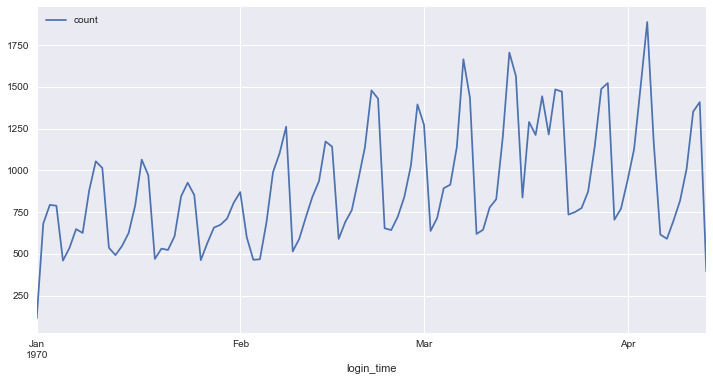

In [15]:
###The spikes in user logins occur overwhelmingly on the weekends, which makes sense since many people use ride share apps to go to parties or bars, which are frequented mostly on the weekends.
###Let's look now at the daily frequency data
#resample to daily frequency
df_day = df_logins.resample('1D').sum()
df_day.plot(kind='line',figsize=(12,6))

Text(0.5, 20.800000000000026, 'Day')

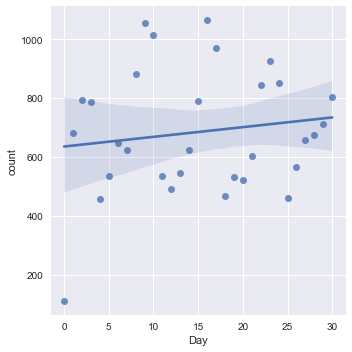

In [16]:
###Resampling to daily frequency shows there is an increasing trend of the average number of logins. At first, through the month of January, there seems to be little or no change in the average number of daily logins, then February starts the increasing trend. Linear model plots will confirm or deny this.
#plot January trend
plot_df = df_day[df_day.index.month==1]
plot_df = plot_df.assign(x = range(plot_df.shape[0]))
sns.lmplot(data=plot_df,x='x',y='count')
plt.xlabel('Day')

Text(0.5, 20.800000000000026, 'Day')

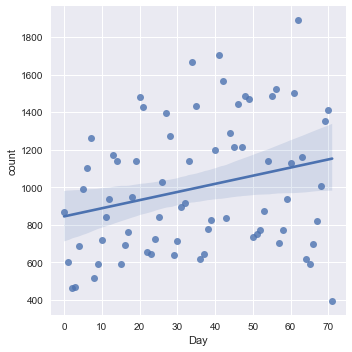

In [17]:
###From the bootstrap confidence interval generated by Seaborn, we can see that there is no clear trend either increasing or decreasing because some of the bootstrap correlation coefficients are positive and some are negative. Therefore we can conclude that the upward trend does not start in January. Let's take a look at the rest of the months.
#plot Feb - April trend
plot_df = df_day[df_day.index.month!=1]
plot_df = plot_df.assign(x = range(plot_df.shape[0]))
sns.lmplot(data=plot_df,x='x',y='count')
plt.xlabel('Day')

In [18]:
#import data from json file
file = 'ultimate_data_challenge.json'
with open(file) as f:
    data = json.loads(f.read())
df = pd.DataFrame(data)

In [19]:
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [20]:
#inspect dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [21]:
#break down trip counts by percentage
df_tripcounts = df['trips_in_first_30_days'].value_counts(normalize=True)*100
df_tripcounts.head(7)

0    30.780
1    28.216
2    14.804
3     7.576
4     5.124
5     3.232
6     2.268
Name: trips_in_first_30_days, dtype: float64

In [22]:
#what percentage of drivers are retained?
np.sum(df_tripcounts[1:])

69.22

In [23]:
#drop rows with no phone information, since we cannot infer that without building a predictive model
df = df.drop(df[df.phone.isna()==True].index,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    41578 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [24]:
df['avg_rating_by_driver'].describe()

count    49406.000000
mean         4.777861
std          0.447114
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [25]:
df['avg_rating_of_driver'].describe()

count    41578.000000
mean         4.601467
std          0.617377
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [26]:
#fill missing values by averaging the mean and median
fill_val = (4.777861+5) / 2
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=fill_val)

#fill missing values with median value
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=4.9)

In [27]:
#inspect data after cleaning, everything looks to be in order
#we have a clean dataset with minimal reduction in its size
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [28]:
###Active users are defined as having any activity in the preceding 30 days. Though the take home challenge writeup does not indicate the current date, we can infer the latest date in the dataset as the current date for our purposes and calculate "active" users based on that date.

In [29]:
#convert to timestamp
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [30]:
#set current date 
current_date = df['last_trip_date'].max()

In [31]:
#find if user qualifies as active
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [32]:
###Only 37.6% of users are active at the end of the six month period. Let's build a predictive model to identify the factors associated with activity. Since the dataset has low dimensionality, then we do not need to reduce it using PCA or some other technique. We will employ the Random Forest Classifier since it is powerful for prediction and will give us insight into the importance of the features.

In [33]:
#create dummy variables for categorical features
df_features = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])
df_features.head()
#set target and drop unuseful columns
target = df_features['active']
df_features = df_features.drop(['last_trip_date','signup_date','active'],axis=1)

<AxesSubplot:xlabel='active', ylabel='avg_dist'>

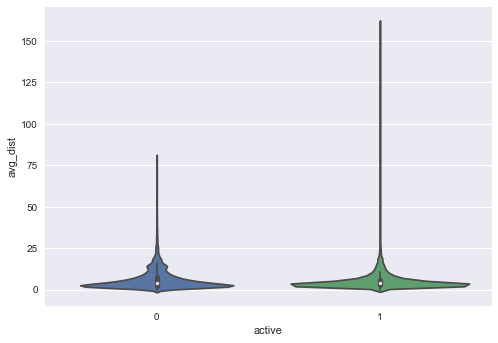

In [34]:
#visualize difference in average distance by activity of user
sns.violinplot(data=df,x='active',y='avg_dist')

In [35]:
pd.pivot_table(df,index='active',aggfunc={'avg_dist':['mean','std']})

avg_dist          
            mean       std
active                    
0       6.190725  6.184010
1       5.113930  4.617779

In [36]:
###There is a difference in the average distance per trip taken in the first 30 days between active users and inactive users, this will be important for predictive modeling.

###The average rating by by driver will probably be informative, let's plot it for active vs inactive users.

(3.5, 5.2)

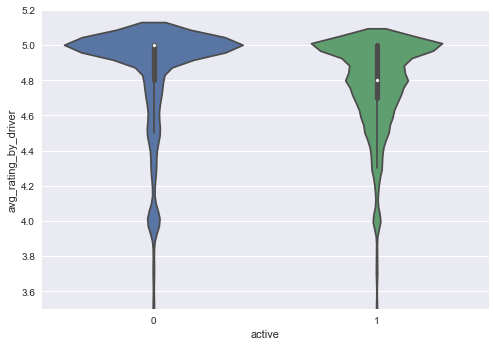

In [37]:
sns.violinplot(data=df,x='active',y='avg_rating_by_driver')
plt.ylim([3.5,5.2])

In [38]:
pd.pivot_table(df,index='active',aggfunc={'avg_rating_by_driver':['median','std']})

avg_rating_by_driver          
                     median       std
active                               
0                       5.0  0.503901
1                       4.8  0.328753

In [39]:
###Interestingly, active users have a lower rating than inactive users, perhaps because active users are more likely to have more total trips and therefore a higher chance of doing something to make the drivers give them a rating less than 5. It seems this feature will be important for predictive modeling.

In [40]:
pd.pivot_table(df,index='active',aggfunc={'trips_in_first_30_days':['mean','std']})

trips_in_first_30_days          
                         mean       std
active                                 
0                    1.657033  2.655767
1                    3.304804  4.985057

In [41]:
###Active users took more trips in their first 30 days. It is not important to verify this using hypothesis testing, because we only want to see the trend and what will be useful for our predictive model.

## Predictive Modeling

In [42]:
df.active.value_counts(normalize=True)*100

0    62.35989
1    37.64011
Name: active, dtype: float64

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [44]:
#scale data
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [45]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2,random_state=42)

In [46]:
#build random forest model with 1000 estimators
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [48]:
rf.score(X_test,y_test)

0.7502267916540671

In [49]:
print(cross_val_score(rf,X_test,np.ravel(y_test),cv=5))
print('Mean Cross Validated Score:',np.mean(cross_val_score(rf,X_test,np.ravel(y_test),cv=5)))

[0.75264484 0.74546371 0.75       0.74596774 0.74647177]
Mean Cross Validated Score: 0.7498230173884781


In [50]:
df_importance = pd.DataFrame(zip(list(df_features.columns),rf.feature_importances_),index=range(df_features.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,avg_dist,0.300721
4,weekday_pct,0.132876
6,avg_rating_by_driver,0.113883
0,trips_in_first_30_days,0.080951
1,avg_rating_of_driver,0.080679
3,surge_pct,0.077055
2,avg_surge,0.067657
8,city_King's Landing,0.047582
10,phone_Android,0.020006
11,phone_iPhone,0.019376


In [51]:
###City, phone type, and ultimate black user stats are all relatively unimportant for the model compared to average distance driven, weekday percentage, and the rating given to the passenger by the driver.

In [52]:
#more metrics for our model
precision_recall_fscore_support(y_test,y_pred)

(array([0.8006462 , 0.66657733]),
 array([0.79935484, 0.66836872]),
 array([0.8       , 0.66747182]),
 array([6200, 3721], dtype=int64))

In [53]:
#weighted metrics
precision_recall_fscore_support(y_test,y_pred,average='weighted')

(0.7503619281105133, 0.7502267916540671, 0.7502935833990295, None)

In [54]:
#generate confusion matrix
confusion_matrix(y_test,y_pred)

array([[4956, 1244],
       [1234, 2487]], dtype=int64)

In [55]:
###75% accuracy is a good start, however let us try a logistic regression model with some hyper parameter tuning, since we already have an idea of the feature importances from the random forest model.

In [56]:
#initialize model
logit = LogisticRegression(solver='lbfgs')
#set parameter grid
param_grid = {'C':np.arange(0.5,5.1,0.1)}
#instantiate and fit grid search object
grid = GridSearchCV(logit,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [57]:
grid.best_estimator_.C

3.0999999999999996

In [58]:
#find coefficients from Logistic Regression
logit_coef = LogisticRegression(C=grid.best_estimator_.C)
logit_coef.fit(X_train,y_train)
df_coef = pd.DataFrame(zip(list(df_features.columns),logit_coef.coef_[0]),index=range(df_features.columns.shape[0]),columns=['feature','coefficient'])
df_coef

,feature,coefficient
0,trips_in_first_30_days,0.083191
1,avg_rating_of_driver,-0.464593
2,avg_surge,2.414756
3,surge_pct,-1.349327
4,weekday_pct,-0.243244
5,avg_dist,0.161589
6,avg_rating_by_driver,-1.326186
7,city_Astapor,-0.759905
8,city_King's Landing,1.132577
9,city_Winterfell,-0.243728


In [59]:
print(np.mean(cross_val_score(grid,X_test,np.ravel(y_test),cv=5)))

0.7423646095717883


- We have not gained any advantage using Logistic Regression for our classifier, the models perform almost identically.

- In conclusion, we have extracted very valuable information from this dataset.

- First, we have built a predictive model with 75% accuracy, that will be useful for future prediction.

- Secondly, the insights from the model are arguably more important and lucrative for the company. Random Forest has given us the most important features and Logistic Regression shows us the effect of the features through the coefficients. Taking the three most important features, we can see the following effects on the "activity" of a rider after 6 months.

- Average distance: This one is tricky because while our logistic regression model shows that an increase in average distance per trip in the first 30 days increases our chances of being an active user, interestingly, the mean avg_dist is larger for inactive riders than for active. Due to this ambiguity in the data, it may not be advisable to try to increase the distance of trips taken in the first 30 days.

- weekday percentage: The chance of being an active user decrease as the percentage of week day use goes up. From this we can see that encouraging people to use the app on the weekend will be beneficial for the company revenue.

- average rating by driver: For this feature, there is a decreased likelihood of being an active user as your rating goes up.

- trips in the first 30 days: As the number of trips in the first 30 days increases, so does the chance that a rider is active after 6 months.

- Based on these insights gained from the model, there are several recomendations for the company.

- Offer incentives to riders to use the app on the weekends

- Incentivize riders to take more trips during their first 30 days on the app

- Encourage drivers not to artificially inflate the ratings they give to users, especially if the driver can tell that they've never done this before.

- Following these guidelines will increase the chances of more active users in the long term, and therefore more revenue for the company.